# [手把手教你完成一个数据科学小项目（3）：数据异常与清洗](https://zhuanlan.zhihu.com/p/42244913)
本系列将全面涉及本项目从爬虫、数据提取与准备、数据异常发现与清洗、分析与可视化等细节，并将代码统一开源在GitHub：[DesertsX/gulius-projects](https://github.com/DesertsX/gulius-projects) ，感兴趣的朋友可以先行 star 哈。

请先阅读[“中国年轻人正带领国家走向危机”，这锅背是不背？](https://zhuanlan.zhihu.com/p/41880873)  一文，以对“手把手教你完成一个数据科学小项目”系列有个全局性的了解。

# 前言
截止目前，我们已经通过[（1）数据爬取](https://zhuanlan.zhihu.com/p/42060094)和[（2）数据提取、IP查询](https://zhuanlan.zhihu.com/p/42151036)，分别完成了对新浪财经《中国年轻人正带领国家走向危机》一文评论数据的爬取和数据的提取。如何你没看前两个教程、也没有一步步运行和理解之前的代码，“不要慌”，直接拿`Sina_Finance_Comments_All_20180811.csv` 数据进行分析、挖掘和可视化就行。
![](https://upload-images.jianshu.io/upload_images/7145358-a37cb0c101e5e142.jpeg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [44]:
import pandas as pd
df = pd.read_csv('Sina_Finance_Comments_All_20180811.csv',encoding='utf-8')
df.head(2)

,Unnamed: 0,No,page,nick,time,content,area,ip,ip_loc,length,against,agree,channel,hot,level,login_type,media_type,mid
0,0,1,1,潘昱材,2018-08-09 09:57:59,我手机三年没换 星巴克没去一次 我的房呢？,广东深圳,119.123.131.179,"广东省深圳市 电信 * GeoIP: Shenzhen, Guangdong, China ...",21,1533779879,0,cj,0,0,0,0,5B6B9FA6-777B83B3-68B55EBD-8C5-8E4
1,1,2,1,Qing诗卿,2018-08-09 09:54:57,回复 @amie是佳妹儿:存钱的重要性……买的基金涨涨跌跌已经不指望了,云南昆明,39.128.26.192,"云南省昆明市 移动 * GeoIP: Kunming, Yunnan, China * Ch...",35,1533779697,0,cj,0,3,0,0,5B6B9EEE-27801AC0-4DBD3FC8-8C5-8F6


In [45]:
df.describe()

,Unnamed: 0,No,page,length,against,agree,hot,level,login_type,media_type
count,3795.000000,3795.000000,3795.000000,3795.000000,3.795000e+03,3795.000000,3795.0,3795.000000,3795.000000,3795.0
mean,1897.000000,1898.000000,95.375494,23.411331,1.533704e+09,3.600791,0.0,0.388142,0.003426,0.0
std,1095.666464,1095.666464,54.783419,19.948979,3.592487e+04,64.637027,0.0,1.157049,0.074319,0.0
min,0.000000,1.000000,1.000000,1.000000,1.533645e+09,0.000000,0.0,0.000000,0.000000,0.0
25%,948.500000,949.500000,48.000000,10.000000,1.533691e+09,0.000000,0.0,0.000000,0.000000,0.0
50%,1897.000000,1898.000000,95.000000,18.000000,1.533697e+09,0.000000,0.0,0.000000,0.000000,0.0
75%,2845.500000,2846.500000,143.000000,30.000000,1.533709e+09,0.000000,0.0,0.000000,0.000000,0.0
max,3794.000000,3795.000000,190.000000,149.000000,1.533979e+09,2816.000000,0.0,19.000000,2.000000,0.0


# 评论数
首先来看下所有评论数随时间的变化情况。

[Python时间、时间戳相互转换](https://www.jianshu.com/p/4fa559efcd49)

In [46]:
from datetime import datetime
time1 = datetime.today()
print(time1)
# 获取时间戳
stamp1 = datetime.timestamp(time1)
print(stamp1)

2018-08-17 00:09:49.994285
1534435789.994285


In [47]:
from datetime import datetime
time_1 = df.loc[0,'time']
print(time_1)
time_2 = datetime.strptime(time_1, '%Y-%m-%d %H:%M:%S') # 将字符串转换成 datetime.datetime 格式 #  'timestamp' requires a 'datetime.datetime' object but received a 'str'
stamp = int(datetime.timestamp(time_2))
print(stamp, len(str(stamp)))

2018-08-09 09:57:59
1533779879 10


## 创建日期列
由日期列创建出对应的时间戳列

In [48]:
from datetime import datetime
def time2stamp(cmnttime):
    cmnttime = datetime.strptime(cmnttime, '%Y-%m-%d %H:%M:%S') 
    stamp = int(datetime.timestamp(cmnttime))
    return stamp
df['stamp'] = df['time'].apply(time2stamp)
df.head()

,Unnamed: 0,No,page,nick,time,content,area,ip,ip_loc,length,against,agree,channel,hot,level,login_type,media_type,mid,stamp
0,0,1,1,潘昱材,2018-08-09 09:57:59,我手机三年没换 星巴克没去一次 我的房呢？,广东深圳,119.123.131.179,"广东省深圳市 电信 * GeoIP: Shenzhen, Guangdong, China ...",21,1533779879,0,cj,0,0,0,0,5B6B9FA6-777B83B3-68B55EBD-8C5-8E4,1533779879
1,1,2,1,Qing诗卿,2018-08-09 09:54:57,回复 @amie是佳妹儿:存钱的重要性……买的基金涨涨跌跌已经不指望了,云南昆明,39.128.26.192,"云南省昆明市 移动 * GeoIP: Kunming, Yunnan, China * Ch...",35,1533779697,0,cj,0,3,0,0,5B6B9EEE-27801AC0-4DBD3FC8-8C5-8F6,1533779697
2,2,3,1,Dcpzzzzzzzz,2018-08-09 09:49:12,哇，真的是树下野狐,浙江绍兴,124.160.212.121,"浙江省杭州市 联通 * GeoIP: Jiaxing, Zhejiang, China * ...",9,1533779352,0,cj,0,0,0,0,5B6B9D95-7CA0D479-AEA0727B-8C5-8C2,1533779352
3,3,4,1,用户5650457955,2018-08-09 09:48:43,贷款买的房子，几个贷款买苹果消费的，少的可怜好吧，哪里来的砖家！？,湖北武汉,119.79.121.158,"湖北省武汉市 鹏博士 * GeoIP: Beijing, China * Computer ...",33,1533779323,0,cj,0,0,0,0,5B6B9D7B-774F799E-150CB2563-8C5-8A1,1533779323
4,4,5,1,不喜欢了ky,2018-08-09 09:47:55,90后厉害了，你说他们，他们怼回去。[赞]。哈哈。,广东广州,113.115.59.2,"广东省 电信 * GeoIP: Dongguan, Guangdong, China * C...",25,1533779275,0,cj,0,0,0,0,5B6B9D4A-71733B02-5783407D-8C5-91A,1533779275


In [49]:
df.shape

(3795, 19)

## 创建评论数计数列
根据评论时间的前后，创建评论数计数列，即最早一条评论记为1，后续递增，最后一条也就是评论总数。

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
df['cmntcount'] =int(df.shape[0])-df['No']
df['cmntcount'].head()

0    3794
1    3793
2    3792
3    3791
4    3790
Name: cmntcount, dtype: int64

## 数据异常
评论数随时间戳的变化曲线有异常，一开始没太在意那一水平线是什么情况所致，也不知道哪里出的有问题，所以就先忽略了，继续后续的探索分析：

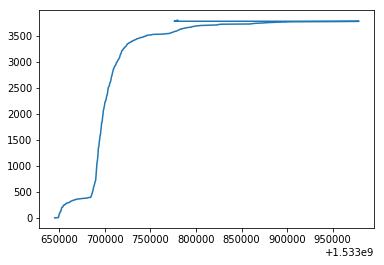

In [51]:
plt.plot(df.stamp, df.cmntcount);

## pyecharts 之评论数变化曲线
本项目将多次使用 pyecharts 进行数据可视化。大家也可以自行安装 `pip install pyecharts` ，并按照官方文档：[pyecharts 图表配置](http://pyecharts.org/#/zh-cn/charts) 进行学习和使用。

具体支持的图表罗列如下：
- Bar（柱状图/条形图）/ Bar3D（3D 柱状图）/ Boxplot（箱形图）/ EffectScatter（带有涟漪特效动画的散点图）/ Funnel（漏斗图）
- Gauge（仪表盘）/ Geo（地理坐标系）/ Graph（关系图）/ HeatMap（热力图）/ Kline（K线图）/ Line（折线/面积图）/ Line3D（3D 折线图） 
- Liquid（水球图）/ Map（地图）/ Parallel（平行坐标系）/ Pie（饼图）/ Polar（极坐标系）/ Radar（雷达图）/ Sankey（桑基图） 
- Scatter（散点图）/ Scatter3D（3D 散点图）/ ThemeRiver（主题河流图）/ WordCloud（词云图） 

注：开源后的 jupyter notebook里 pyecharts 图表部分无法显示，需 download 后运行代码过才可查看。因此重新贴一下 png 图片方便查看

In [52]:
df['time_ymd'] = df.time.apply(lambda x:x.split(' ')[0]) # 截取年月日
df_ymdcount = df.groupby('time_ymd')['cmntcount'].count()
from pyecharts import Line
line = Line("每日评论数变化情况")
line.add("日期", df_ymdcount.index, df_ymdcount.values,line_type='dotted')
line

看到 notebook 里一片空白的，请看这里：
<img src='images/每日评论数变化情况-bug版.png'>

In [53]:
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:]) # 截取到小时，并且为了横坐标显示方便，去掉年份
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Line
line = Line("每小时评论数")
line.add("小时", df_mdhcount.index, df_mdhcount.values,line_opacity=1,line_type='dotted')
line

<img src='images/每小时评论数-bug版.png'>

In [54]:
from pyecharts import Bar
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=0,xaxis_rotate=-90)
bar

<img src='images/每小时评论数柱形图-bug版.png'>

In [55]:
from pyecharts import Bar, Line, Overlap

attr = ['A', 'B', 'C', 'D', 'E', 'F']
v1 = [10, 20, 30, 40, 50, 60]
v2 = [38, 28, 58, 48, 78, 68]
bar = Bar("Line - Bar 示例")
bar.add("bar", attr, v1)
line = Line()
line.add("line", attr, v2)

overlap = Overlap()
overlap.use_theme("macarons")
overlap.add(bar)
overlap.add(line)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

## 组合图 overlap
[pyecharts 配置文档](http://pyecharts.org/#/zh-cn/charts) 
overlap 示例： 

In [56]:
from pyecharts import Bar, Line, Overlap
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:])
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

<img src='images/3-每小时评论数组合图-bug版.png'>

# 异常检测
由上图可知异常的时间段在2018-08-09 08-09点，对这几个时间点的数据进行查看，发生有重复，并且数据一开始就没想按照时间前后的顺序排列的。不过不知道这个问题为什么会发生，感觉爬虫的时候貌似没有问题，后面数据提取也中规中矩，后来重新爬取数据时发现，页码数不是到显示的总页数处停止，而是在比新闻文章评论区所展示的页码数之前的位置中断了，因此去重并重新设置下 index 和评论数计数列等等

In [57]:
df[df.time_mdh.str.contains('08-09 08')]

,Unnamed: 0,No,page,nick,time,content,area,ip,ip_loc,length,...,channel,hot,level,login_type,media_type,mid,stamp,cmntcount,time_ymd,time_mdh
19,19,20,1,垃圾筐与电影院,2018-08-09 08:55:27,有个研究显示，70后智商是持续下降的。,四川成都,222.212.88.71,"四川省成都市 电信 * GeoIP: Chengdu, Sichuan, China * C...",19,...,cj,0,0,0,0,5B6B90FC-DED45847-6C9A7EAC-8C5-924,1533776127,3775,2018-08-09,08-09 08
219,219,220,11,垃圾筐与电影院,2018-08-09 08:55:27,有个研究显示，70后智商是持续下降的。,四川成都,222.212.88.71,"四川省成都市 电信 * GeoIP: Chengdu, Sichuan, China * C...",19,...,cj,0,0,0,0,5B6B90FC-DED45847-6C9A7EAC-8C5-924,1533776127,3575,2018-08-09,08-09 08
220,220,221,12,刚马甲,2018-08-09 08:49:28,呵 商品经济炒作挖坑哄年轻人消费生孩子还不是你们上一辈正在做的,上海,211.136.126.10,"上海市 移动 * GeoIP: Shanghai, China * China Mobile",31,...,cj,0,0,0,0,5B6B8F97-D3887E0A-12DF3604B-8C5-854,1533775768,3574,2018-08-09,08-09 08
221,221,222,12,无双199207,2018-08-09 08:43:59,10万是一平米到0.4平米，谢谢。,河北承德,110.254.139.162,"河北省承德市 联通 * GeoIP: Chengde, Hebei, China * Chi...",33,...,cj,0,1,0,0,5B6B8E4F-6EFE8BA2-15E48A8A2-8C5-973,1533775439,3573,2018-08-09,08-09 08
222,222,223,12,大着肚子做B超,2018-08-09 08:42:45,哈哈哈。把锅甩给年轻人了。厉害,江苏常州,223.104.145.254,"江苏省 移动 * GeoIP: Suzhou, Jiangsu, China * China...",15,...,cj,0,0,0,0,5B6B8E02-DF6891FE-BCC8EA44-8C5-8B4,1533775365,3572,2018-08-09,08-09 08
223,223,224,12,amie是佳妹儿,2018-08-09 08:41:21,但直觉告诉我之后钱会越来越是钱，勒紧裤腰带多存点吧,四川成都,110.188.59.203,"四川省成都市 电信 * GeoIP: Chengdu, Sichuan, China * C...",25,...,cj,0,0,0,0,5B6B8DB1-6EBC3BCB-6EA77844-8C5-803,1533775281,3571,2018-08-09,08-09 08
224,224,225,12,Just-sosoul,2018-08-09 08:37:36,我是来看评论的,河南开封,61.158.146.87,"河南省洛阳市 联通 * GeoIP: Zhengzhou, Henan, China * C...",7,...,cj,0,0,0,0,5B6B8CCE-3D9E9257-7C9C72B4-8C5-97A,1533775056,3570,2018-08-09,08-09 08
225,225,226,12,5块二毛1,2018-08-09 08:37:16,我们腰杆硬，还能挺挺,四川乐山,125.65.14.209,"四川省乐山市 电信 * GeoIP: Chengdu, Sichuan, China * C...",10,...,cj,0,1,0,0,5B6B8CBC-7D410ED1-94A93627-8C5-8EF,1533775036,3569,2018-08-09,08-09 08
226,226,227,12,陶慕白zz,2018-08-09 08:35:20,我去年买了个登山包超耐磨[二哈][二哈][二哈],北京,223.104.254.16,"北京市 移动 * GeoIP: Beijing, China * China Mobile",24,...,cj,0,0,0,0,5B6B8C47-DF68FE10-168A92154-8C5-987,1533774920,3568,2018-08-09,08-09 08
227,227,228,12,Nomine_noBB,2018-08-09 08:33:07,不➕[doge]或引号？,湖北武汉,171.43.150.196,"湖北省武汉市 电信 * GeoIP: Wuhan, Hubei, China * China...",21,...,cj,0,1,0,0,5B6B8BC0-AB2B96C4-6DCFA02F-8C5-80C,1533774787,3567,2018-08-09,08-09 08


In [58]:
df[df.time_mdh.str.contains('08-09 09')]

,Unnamed: 0,No,page,nick,time,content,area,ip,ip_loc,length,...,channel,hot,level,login_type,media_type,mid,stamp,cmntcount,time_ymd,time_mdh
0,0,1,1,潘昱材,2018-08-09 09:57:59,我手机三年没换 星巴克没去一次 我的房呢？,广东深圳,119.123.131.179,"广东省深圳市 电信 * GeoIP: Shenzhen, Guangdong, China ...",21,...,cj,0,0,0,0,5B6B9FA6-777B83B3-68B55EBD-8C5-8E4,1533779879,3794,2018-08-09,08-09 09
1,1,2,1,Qing诗卿,2018-08-09 09:54:57,回复 @amie是佳妹儿:存钱的重要性……买的基金涨涨跌跌已经不指望了,云南昆明,39.128.26.192,"云南省昆明市 移动 * GeoIP: Kunming, Yunnan, China * Ch...",35,...,cj,0,3,0,0,5B6B9EEE-27801AC0-4DBD3FC8-8C5-8F6,1533779697,3793,2018-08-09,08-09 09
2,2,3,1,Dcpzzzzzzzz,2018-08-09 09:49:12,哇，真的是树下野狐,浙江绍兴,124.160.212.121,"浙江省杭州市 联通 * GeoIP: Jiaxing, Zhejiang, China * ...",9,...,cj,0,0,0,0,5B6B9D95-7CA0D479-AEA0727B-8C5-8C2,1533779352,3792,2018-08-09,08-09 09
3,3,4,1,用户5650457955,2018-08-09 09:48:43,贷款买的房子，几个贷款买苹果消费的，少的可怜好吧，哪里来的砖家！？,湖北武汉,119.79.121.158,"湖北省武汉市 鹏博士 * GeoIP: Beijing, China * Computer ...",33,...,cj,0,0,0,0,5B6B9D7B-774F799E-150CB2563-8C5-8A1,1533779323,3791,2018-08-09,08-09 09
4,4,5,1,不喜欢了ky,2018-08-09 09:47:55,90后厉害了，你说他们，他们怼回去。[赞]。哈哈。,广东广州,113.115.59.2,"广东省 电信 * GeoIP: Dongguan, Guangdong, China * C...",25,...,cj,0,0,0,0,5B6B9D4A-71733B02-5783407D-8C5-91A,1533779275,3790,2018-08-09,08-09 09
5,5,6,1,sadasusual,2018-08-09 09:43:35,我是刚来的 请问是直接笑吗[嘻嘻][嘻嘻][嘻嘻][嘻嘻][嘻嘻],英国英格兰,31.205.73.115,"英国 * GeoIP: Bermondsey, Southwark, United Kin...",33,...,cj,0,0,0,0,5B6B9C44-1FCD4973-13EA9AAC2-8C5-857,1533779015,3789,2018-08-09,08-09 09
6,6,7,1,先思昱,2018-08-09 09:41:08,房价这么高不怪 但是怪起年轻人了 厉害厉害,贵州毕节,58.42.172.185,"贵州省毕节市 电信 * GeoIP: Bijie, Guizhou, China * Chi...",21,...,cj,0,0,0,0,5B6B9BB4-3A2AACB9-98D18A8F-8C5-8F7,1533778868,3788,2018-08-09,08-09 09
7,7,8,1,MonaRisa1998,2018-08-09 09:36:15,还是很多响应号召生二胎的，毕竟这是传统文化，是诱惑，90后经历了独生的一代，面临免费的二胎能...,广东东莞,27.44.26.33,"广东省东莞市 联通 * GeoIP: Dongguan, Guangdong, China ...",60,...,cj,0,2,0,0,5B6B9A8D-1B2C1A21-7ED09C28-8C5-7D3,1533778575,3787,2018-08-09,08-09 09
8,8,9,1,笨松鼠一只,2018-08-09 09:34:57,我的老家东北，你知道有多少公务员在四十岁的时候实现半退休吗？十年前有多少人在上班期间就是打麻...,北京,117.136.38.38,"北京市 移动 * GeoIP: Beijing, China * China Mobile",147,...,cj,0,10,0,0,5B6B9A3E-75882626-13DE6E5B1-8C5-93D,1533778497,3786,2018-08-09,08-09 09
9,9,10,1,錐生零的腹肌我能舔一萬年,2018-08-09 09:31:55,问题是 烟台的海景房保利爱尚海还有中海 祥隆 真的没有那么贵 而且不限购 我今年一月刚买了套...,山东烟台,182.42.64.70,"山东省烟台市 电信 * GeoIP: Yantai, Shandong, China * C...",76,...,cj,0,6,0,0,5B6B9988-B62A4046-6154E28F-8C5-8D4,1533778315,3785,2018-08-09,08-09 09


一开始也不清楚该问题为什么会发生，感觉爬虫部分没有问题，提取数据也中规中矩，后来重新爬取数据时发现，页码数在总页数的前几页就停止了。

至于重复是如何产生的，也是未解之谜，有知道的小小伙伴可以留言告诉我哈。

不过虽然不知道异常究竟如何产生的，但去除异常数据的方式却可由去重并重新设置下 index 索引和重设评论数计数列等实现。

# 数据清洗
删除重复行并重置索引
`pandas.DataFrame.drop_duplicates`
- drop_duplicates(subset=None, keep='first', inplace=False)
- keep : {‘first’, ‘last’, False}, default ‘first’
    - first : Drop duplicates except for the first occurrence.
    - last : Drop duplicates except for the last occurrence.
    - False : Drop all duplicates.
由于本文一开始的数据就存在异常，所以“一朝回到解放前”，让我们重新读取数据，一切从头开始，首先就是删除掉重复的行：
![](https://upload-images.jianshu.io/upload_images/7145358-ee282ecf62a8ff8c.jpeg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
将用户昵称和评论内容均一致的行删除重复，输出前后 `shape` 的变化，即为删除了22行：

In [60]:
df = pd.read_csv('Sina_Finance_Comments_All_20180811.csv',encoding='utf-8')
print(df.shape)
df.drop_duplicates(subset=['nick', 'content'], keep='first',inplace=True)
print(df.shape)

(3795, 18)
(3773, 18)


创建新的时间列

In [61]:
from datetime import datetime
def time2stamp(cmnttime):
    cmnttime = datetime.strptime(cmnttime, '%Y-%m-%d %H:%M:%S') 
    stamp = int(datetime.timestamp(cmnttime))
    return stamp
df['stamp'] = df['time'].apply(time2stamp)
df['time_ymd'] = df.time.apply(lambda x:x.split(' ')[0]) # 年月日
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:]) #月日时 # 方便后续可视化时横坐标展示
df.head()

,Unnamed: 0,No,page,nick,time,content,area,ip,ip_loc,length,...,agree,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh
0,0,1,1,潘昱材,2018-08-09 09:57:59,我手机三年没换 星巴克没去一次 我的房呢？,广东深圳,119.123.131.179,"广东省深圳市 电信 * GeoIP: Shenzhen, Guangdong, China ...",21,...,0,cj,0,0,0,0,5B6B9FA6-777B83B3-68B55EBD-8C5-8E4,1533779879,2018-08-09,08-09 09
1,1,2,1,Qing诗卿,2018-08-09 09:54:57,回复 @amie是佳妹儿:存钱的重要性……买的基金涨涨跌跌已经不指望了,云南昆明,39.128.26.192,"云南省昆明市 移动 * GeoIP: Kunming, Yunnan, China * Ch...",35,...,0,cj,0,3,0,0,5B6B9EEE-27801AC0-4DBD3FC8-8C5-8F6,1533779697,2018-08-09,08-09 09
2,2,3,1,Dcpzzzzzzzz,2018-08-09 09:49:12,哇，真的是树下野狐,浙江绍兴,124.160.212.121,"浙江省杭州市 联通 * GeoIP: Jiaxing, Zhejiang, China * ...",9,...,0,cj,0,0,0,0,5B6B9D95-7CA0D479-AEA0727B-8C5-8C2,1533779352,2018-08-09,08-09 09
3,3,4,1,用户5650457955,2018-08-09 09:48:43,贷款买的房子，几个贷款买苹果消费的，少的可怜好吧，哪里来的砖家！？,湖北武汉,119.79.121.158,"湖北省武汉市 鹏博士 * GeoIP: Beijing, China * Computer ...",33,...,0,cj,0,0,0,0,5B6B9D7B-774F799E-150CB2563-8C5-8A1,1533779323,2018-08-09,08-09 09
4,4,5,1,不喜欢了ky,2018-08-09 09:47:55,90后厉害了，你说他们，他们怼回去。[赞]。哈哈。,广东广州,113.115.59.2,"广东省 电信 * GeoIP: Dongguan, Guangdong, China * C...",25,...,0,cj,0,0,0,0,5B6B9D4A-71733B02-5783407D-8C5-91A,1533779275,2018-08-09,08-09 09


按时间排序后重置 index 索引
[pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)  
[pandas.DataFrame.reset_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [62]:
df.sort_values(by=["stamp"],ascending=False,inplace=True)
df.reset_index(inplace=True,drop=True)

创建评论数计数列后，将数据存储到新的csv里，后续就可以只在新csv里操作，而不必每次重新清洗数据了：

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
df['cmntcount'] =int(df.shape[0])-df.index
df.to_csv('Sina_Finance_Comments_All_20180811_Cleaned.csv', encoding='utf-8', line_terminator='\r\n')

In [64]:
from pyecharts import Bar, Line, Overlap
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:])
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

# 小结
本次遇到数据里出现异常也是始料不及，想当然的设想数据格式准确并去进行分析和可视化的结果就是一顿操作后，发现不得不掉头解决掉异常，于是很多努力“一朝回到解放前”，但这可能就是人生吧，那有什么一帆风顺，人生不就是起落落落落落落落落落嘛！逃。

本系列文章：
[“中国年轻人正带领国家走向危机”，这锅背是不背？](https://zhuanlan.zhihu.com/p/41880873)  
[手把手教你完成一个数据科学小项目（1）：数据爬取](https://zhuanlan.zhihu.com/p/42060094)  
[手把手教你完成一个数据科学小项目（2）：数据提取、IP 查询](https://zhuanlan.zhihu.com/p/42151036)   